In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings as wr
wr.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_df.shape

(614, 13)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
print(28*'*'+' Categorical Columns '+29*"*")
categorical_cols = [col for col in train_df.columns if train_df[col].dtype == 'object']
print(categorical_cols)
print()
print(28*'*'+' Numerical Columns '+30*"*")
numerical_cols = [col for col in train_df.columns if train_df[col].dtype != 'object']
print(numerical_cols)

**************************** Categorical Columns *****************************
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

**************************** Numerical Columns ******************************
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


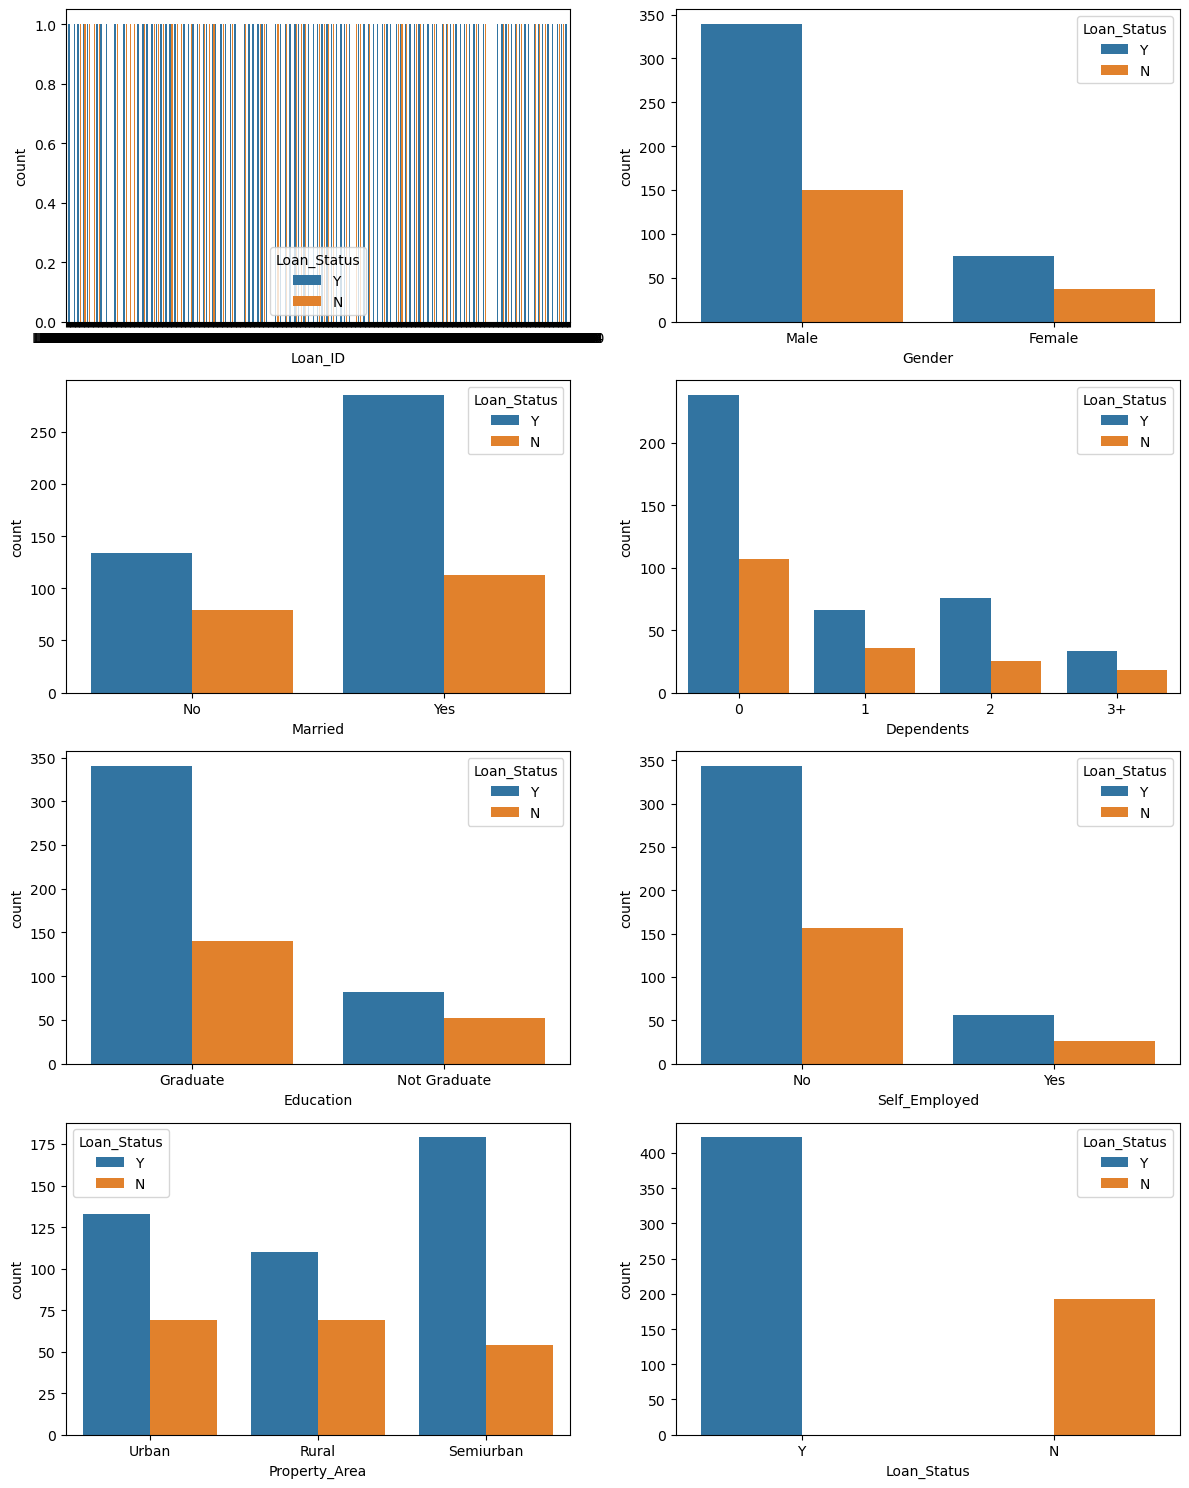

In [7]:
import seaborn as sns

fig, axes = plt.subplots(4, 2, figsize=(12, 15))

for idx, cat_col in enumerate(categorical_cols):
    row, col = divmod(idx, 2)
    sns.countplot(x=cat_col, data=train_df, hue='Loan_Status', ax=axes[row, col])

plt.tight_layout()
plt.show()

# ***Encoding categorical features***

In [8]:
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [9]:
from sklearn.model_selection import train_test_split


X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [11]:
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

# ***All the classifiers***

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score


classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier()
]



# Loop through each classifier

for clf in classifiers:
    clf_name = clf.__class__.__name__
    print(f"Classifier: {clf_name}")
    
    # Training the Classifier
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_train)
    
    # Evaluate on training data
    train_accuracy = accuracy_score(y_train, y_pred)
    train_f1 = f1_score(y_train, y_pred)
    print("Training Data Set Accuracy:", train_accuracy)
    print("Training Data F1 Score:", train_f1)

    # Evaluate using cross-validation
    val_f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
    val_accuracy_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Validation Mean F1 Score:", np.mean(val_f1_scores))
    print("Validation Mean Accuracy:", np.mean(val_accuracy_scores))

    print("=" * 50)
    

Classifier: DecisionTreeClassifier
Training Data Set Accuracy: 1.0
Training Data F1 Score: 1.0
Validation Mean F1 Score: 0.7026989882184406
Validation Mean Accuracy: 0.7412904555761699
Classifier: RandomForestClassifier
Training Data Set Accuracy: 1.0
Training Data F1 Score: 1.0
Validation Mean F1 Score: 0.7105036634489533
Validation Mean Accuracy: 0.7983920841063699
Classifier: GradientBoostingClassifier
Training Data Set Accuracy: 0.8105906313645621
Training Data F1 Score: 0.8781127129750984
Validation Mean F1 Score: 0.7062864248341686
Validation Mean Accuracy: 0.7902082044939187
Classifier: AdaBoostClassifier
Training Data Set Accuracy: 0.8553971486761711
Training Data F1 Score: 0.903137789904502
Validation Mean F1 Score: 0.6863606498628627
Validation Mean Accuracy: 0.7637394351680066
Classifier: LogisticRegression
Training Data Set Accuracy: 0.7963340122199593
Training Data F1 Score: 0.8680738786279684
Validation Mean F1 Score: 0.707914754503558
Validation Mean Accuracy: 0.79431045

***We can see RandomForestClassifier() and LogisticRegressionClassifier() performed better***

# ***Hyperparameter Tuning***

In [13]:
from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter search space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),
    'max_depth': hp.quniform('max_depth', 2, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1),
    'max_features': hp.uniform('max_features', 0.1, 1)
}

# Define the objective function to minimize (e.g., negative mean F1 score)
def objective(params):
    clf = RandomForestClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features'],
        random_state=42
    )
    
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
    return -scores.mean()

# Perform Bayesian hyperparameter tuning
best = fmin(objective, space, algo=tpe.suggest, max_evals=100)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(best)


100%|██████████| 100/100 [02:04<00:00,  1.24s/trial, best loss: -0.7143568144419271]
Best Hyperparameters:
{'max_depth': 14.0, 'max_features': 0.405428213541944, 'min_samples_leaf': 5.0, 'min_samples_split': 8.0, 'n_estimators': 125.0}


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Best RF model

best_rf_model = RandomForestClassifier(
    n_estimators = 149,
    max_depth=7,
    min_samples_split=11,
    min_samples_leaf=6,
    max_features=0.6183182421428571,
    random_state=42
)

# Fit the model on your training data
best_rf_model.fit(X_train, y_train)

# Predict on the validation or test set
y_pred = best_rf_model.predict(X_test_imp)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8617886178861789
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

Confusion Matrix:
 [[22 16]
 [ 1 84]]
